Task 1. Жай сызықтық регрессияны қолмен есептеу (опциональная)

Берілгендер:
X = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 6]

Тапсырма:
Орта мәндерді есепте,
Формула арқылы w мен b тап,
y_pred есепте,
График сал


X орта мәні: 3.0
y орта мәні: 4.2
w коэффициенті: 0.8
b (intercept): 1.7999999999999998
Болжанған мәндер: [2.6 3.4 4.2 5.  5.8]


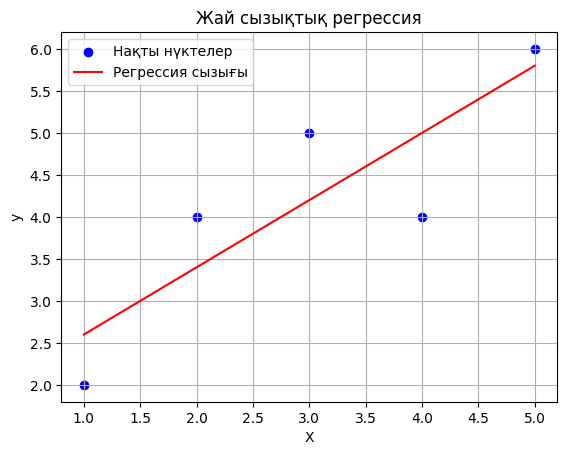

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Берілгендер
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 6])

# 1. Орта мәндер
X_mean = X.mean()
y_mean = y.mean()

print("X орта мәні:", X_mean)
print("y орта мәні:", y_mean)

# 2. w коэффициентін формула арқылы есептеу
numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
w = numerator / denominator

# 3. b – intercept
b = y_mean - w * X_mean

print("w коэффициенті:", w)
print("b (intercept):", b)

# 4. Жорамал мәндер
y_pred = w * X + b
print("Болжанған мәндер:", y_pred)

# 5. График
plt.scatter(X, y, color="blue", label="Нақты нүктелер")
plt.plot(X, y_pred, color="red", label="Регрессия сызығы")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Жай сызықтық регрессия")
plt.grid(True)
plt.show()

Task 2. Scikit-learn арқылы Linear Regression

Берілгендер:
X = [[10], [20], [30], [40], [50]]
y = [15, 25, 35, 45, 60]

Тапсырма:
LinearRegression() қолдан


coef_, intercept_ тап


60 үшін болжам жаса


In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Деректер
X = np.array([[10], [20], [30], [40], [50]])
y = np.array([15, 25, 35, 45, 60])

# Модель
model = LinearRegression()
model.fit(X, y)

# Параметрлер
w = model.coef_
b = model.intercept_

print("Коэффициент (w):", w)
print("Бос мүшe (b):", b)

# 60 үшін болжам
prediction = model.predict([[60]])
print("X = 60 үшін болжам:", prediction[0])

Коэффициент (w): [1.1]
Бос мүшe (b): 3.0
X = 60 үшін болжам: 69.0


Task 3. Қате есептеу (MSE)

Алдыңғы есептің нәтижесі бойынша:
mean_squared_error есепте
Қолмен есептеп салыстыр


In [6]:
from sklearn.metrics import mean_squared_error

y_true = [15, 25, 35, 45, 60]     # Нақты мәндер
y_pred = model.predict(X)        # Модель болжамдары

mse = mean_squared_error(y_true, y_pred)
print("MSE:", mse)

MSE: 1.9999999999999942


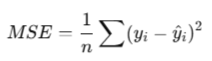

In [7]:
errors = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
mse_manual = sum(errors) / len(errors)

print("Қолмен есептелген MSE:", mse_manual)

Қолмен есептелген MSE: 1.9999999999999942


Task 4. Train / Test бөлу

Кез келген dataset қолдан:
train_test_split
Linear Regression үйрет
Train MSE және Test MSE салыстыр


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import numpy as np

# 1. Деректер генерациялау (мысал dataset)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# 2. Train/Test бөлу
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Модель құру және үйрету
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Болжау жасау
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 5. Қате есептеу (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 72.92252788103295
Test MSE: 104.20222653187027


Task 5. Ridge регрессияны қосу

Сол dataset үшін:
LinearRegression
Ridge(alpha=0.1)
Ridge(alpha=10)
үш модель құрып:
MSE салыстыр
Қайсысы overfitting берді?


In [9]:
from sklearn.linear_model import Ridge

# 1. Негізгі 3 модель
lin_reg = LinearRegression()
ridge_01 = Ridge(alpha=0.1)
ridge_10 = Ridge(alpha=10)

models = {
    "LinearRegression": lin_reg,
    "Ridge alpha=0.1": ridge_01,
    "Ridge alpha=10": ridge_10
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"{name} → Train MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")

LinearRegression → Train MSE: 72.923, Test MSE: 104.202
Ridge alpha=0.1 → Train MSE: 72.926, Test MSE: 104.330
Ridge alpha=10 → Train MSE: 101.064, Test MSE: 142.996


Task 6. Alpha әсерін зерттеу (опциональная)

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
Тапсырма:
Әр alpha үшін Ridge үйрет
Салмақтардың (coef) өзгеруін графикке түсір
Қорытынды жаса


In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Датасетті жүктеу
X, y = fetch_california_housing(return_X_y=True)


In [19]:
#Train / Test бөлу
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Масштабтау
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Alpha тізімі
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

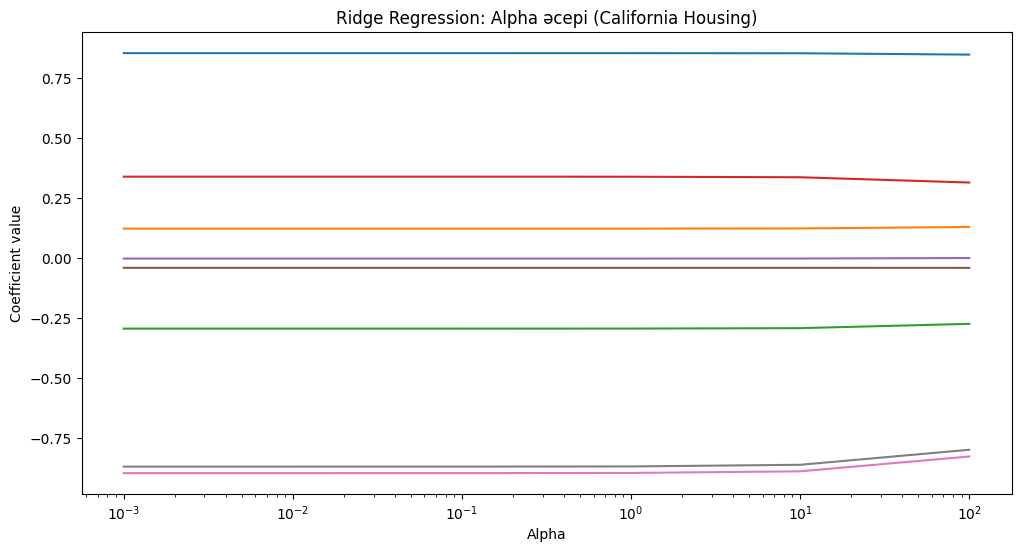

In [21]:
# Коэффициенттердің өзгеруін графикке түсіру
plt.figure(figsize=(12, 6))

for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=f'Feature {i}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient value')
plt.title('Ridge Regression: Alpha әсері (California Housing)')
plt.show()